In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [175]:
dataset = pd.read_csv('/home/gustavo/Downloads/ova.csv')
dataset.head()
dataset.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


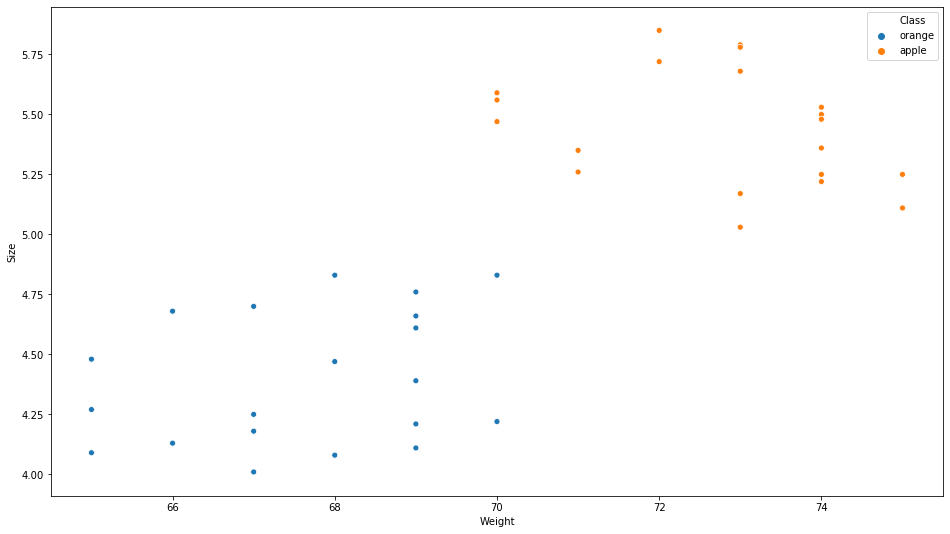

In [176]:
plt.figure(figsize = (16,9))
sns.scatterplot(x = dataset['Weight'], y = dataset['Size'], hue = dataset['Class'])

In [177]:
features_df = dataset['Size']
features_df.describe()

count    40.000000
mean      4.922750
std       0.590063
min       4.010000
25%       4.360000
50%       4.930000
75%       5.472500
max       5.850000
Name: Size, dtype: float64

In [178]:
labels = np.array(dataset['Class'])
le = preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels)

In [179]:
features = np.array(features_df)
features = features/5.85


weight = np.random.rand(1)
weight_bias = np.random.rand(1)


print('FEATURES')
print(features)
print()
print('-'*100)
print()
print('WEIGHTS')
print(weight)
print()
print('-'*100)

FEATURES
[0.75042735 0.71965812 0.6991453  1.         0.8034188  0.97094017
 0.95042735 0.87350427 0.91623932 0.72991453 0.98974359 0.93504274
 0.94529915 0.76410256 0.89230769 0.76581197 0.7965812  0.8974359
 0.71452991 0.94017094 0.70598291 0.82564103 0.78803419 0.6974359
 0.72649573 0.91452991 0.68547009 0.72136752 0.8974359  0.8991453
 0.98803419 0.8        0.97777778 0.88376068 0.82564103 0.7025641
 0.81367521 0.93675214 0.95555556 0.85982906]

----------------------------------------------------------------------------------------------------

WEIGHTS
[0.48925342]

----------------------------------------------------------------------------------------------------


In [180]:
lr = 0.1
for epochs in range(5000):
    count = 0
    for sample in features: 
        prediction = (np.dot(sample,weight)+(np.dot(weight_bias,1)))
        if prediction > 0.5:
            prediction = 1
        else:
            prediction = 0
        error = labels[count] - prediction
        weight_bias = weight_bias+(lr*error)
        weight = weight+(lr * error * sample)
        count+=1

In [181]:
predictions = []
for sample in features:
    prediction = (np.dot(sample,weight)+(np.dot(weight_bias,1)))
    if prediction > 0.5:
        prediction = 1
    else:
        prediction = 0
    predictions.append(prediction)

In [182]:
predictions_df = pd.DataFrame(predictions)
labels_df = pd.DataFrame(labels)
tabela_comparativa = pd.concat([predictions_df,labels_df],axis = 1)

In [183]:
tabela_comparativa.columns = ['Predictions','Target']
tabela_comparativa

,Predictions,Target
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


In [184]:
body_count = 0
for i in range(sample.size):
    if predictions[i]!=labels[i]:
        print(i)
        body_count+=1
    else:
        continue
print("Numero de amostras erradas: ", body_count)

Numero de amostras erradas:  0
